In [1]:
# Importing table and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset splitting and imputing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import LeaveOneOut

In [3]:
### Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor

### Importing dataset available in sklearn
from sklearn import datasets
from sklearn.utils import shuffle

In [4]:
#Dataset processing and EDA
#data = pd.read_excel('Data-set1.xlsx')
# Reading .csv file for complete, cleaned dataset
df_path= pd.read_csv('llzo_dataset_clean.csv')


In [7]:
#df_raw=pd.read_csv(df_path)
df = df_path[0:176]
df.head(176)

,source,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,conductivity,log_cond,good_cond,li_dopant,la_dopant,zr_dopant,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,10.1016/j.ssi.2017.11.027,5.00,3.00,0.00,0.00,0.00,2.00,NaN,0.00,-6.14,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
1,10.1016/j.jpowsour.2012.01.094,5.50,3.00,0.50,0.00,0.00,1.50,NaN,0.00,-4.03,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
2,10.1016/j.ssi.2017.09.005,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,-3.82,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
3,10.1039/c2ra01042a,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,-4.05,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
4,10.1016/j.ssi.2017.11.027,6.05,2.95,1.00,0.00,0.05,1.00,NaN,0.00,-3.89,0.00,NaN,ca,ta,0.00,126.00,78.00,0.00,1.00,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,10.1016/j.ceramint.2018.01.065,7.00,3.00,2.00,0.00,0.00,0.00,87.70,0.00,-3.73,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
172,10.1111/jace.14736,7.00,3.00,2.00,0.00,0.00,0.00,88.70,0.00,-4.59,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
173,10.1016/j.matlet.2018.08.006,7.00,3.00,2.00,0.00,0.00,0.00,84.60,0.00,-4.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
174,10.1016/j.jpowsour.2013.10.089,6.85,3.09,2.07,0.00,0.00,0.00,NaN,0.00,-3.77,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
df.head()

,source,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,conductivity,log_cond,good_cond,li_dopant,la_dopant,zr_dopant,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,10.1016/j.ssi.2017.11.027,5.00,3.00,0.00,0.00,0.00,2.00,NaN,0.00,-6.14,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
1,10.1016/j.jpowsour.2012.01.094,5.50,3.00,0.50,0.00,0.00,1.50,NaN,0.00,-4.03,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
2,10.1016/j.ssi.2017.09.005,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,-3.82,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
3,10.1039/c2ra01042a,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,-4.05,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
4,10.1016/j.ssi.2017.11.027,6.05,2.95,1.00,0.00,0.05,1.00,NaN,0.00,-3.89,0.00,NaN,ca,ta,0.00,126.00,78.00,0.00,1.00,1.50


In [10]:
df.dtypes

source              object
li_sto             float64
la_sto             float64
zr_sto             float64
li_dop_sto         float64
la_dop_sto         float64
zr_dop_sto         float64
rel_dens_%         float64
conductivity       float64
log_cond           float64
good_cond          float64
li_dopant           object
la_dopant           object
zr_dopant           object
li_dop_ionicrad    float64
la_dop_ionicrad    float64
zr_dop_ionicrad    float64
li_dop_enev        float64
la_dop_enev        float64
zr_dop_enev        float64
dtype: object

In [11]:
df.columns

Index(['source', 'li_sto', 'la_sto', 'zr_sto', 'li_dop_sto', 'la_dop_sto',
       'zr_dop_sto', 'rel_dens_%', 'conductivity', 'log_cond', 'good_cond',
       'li_dopant', 'la_dopant', 'zr_dopant', 'li_dop_ionicrad',
       'la_dop_ionicrad', 'zr_dop_ionicrad', 'li_dop_enev', 'la_dop_enev',
       'zr_dop_enev'],
      dtype='object')

In [12]:
df.describe()

,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,conductivity,log_cond,good_cond,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
count,176.00,176.00,176.00,176.00,176.00,176.00,113.00,176.00,176.00,176.00,176.00,176.00,176.00,176.00,176.00,176.00
mean,6.51,2.99,1.76,0.10,0.03,0.24,90.99,0.00,-3.73,0.50,25.81,21.03,41.88,0.78,0.14,0.95
std,0.35,0.16,0.32,0.12,0.09,0.32,5.67,0.00,0.76,0.50,28.81,51.15,39.09,0.87,0.34,0.91
min,5.00,2.40,0.00,0.00,0.00,0.00,66.00,0.00,-7.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.28,3.00,1.60,0.00,0.00,0.00,88.40,0.00,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.50,3.00,1.90,0.00,0.00,0.09,92.19,0.00,-3.57,0.50,0.00,0.00,73.00,0.00,0.00,1.50
75%,6.75,3.00,2.00,0.20,0.00,0.40,95.00,0.00,-3.24,1.00,55.00,0.00,78.00,1.81,0.00,1.60
max,7.42,4.00,2.07,0.50,0.60,2.00,99.90,0.00,-2.69,1.00,63.00,175.00,109.80,2.01,1.12,2.36


In [13]:
df.isnull().sum().sort_values(ascending = False).head(10)

la_dopant          150
li_dopant           97
zr_dopant           81
rel_dens_%          63
source               0
la_dop_enev          0
li_dop_enev          0
zr_dop_ionicrad      0
la_dop_ionicrad      0
li_dop_ionicrad      0
dtype: int64

In [16]:
# Dropping unnecessary columns for prediction
df = df.drop(['conductivity','log_cond','li_dopant','la_dopant','zr_dopant','source'], axis=1)
df.head()


,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,good_cond,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,5.00,3.00,0.00,0.00,0.00,2.00,NaN,0.00,0.00,0.00,78.00,0.00,0.00,1.50
1,5.50,3.00,0.50,0.00,0.00,1.50,NaN,0.00,0.00,0.00,78.00,0.00,0.00,1.50
2,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,0.00,156.00,78.00,0.00,0.89,1.50
3,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,0.00,156.00,78.00,0.00,0.89,1.50
4,6.05,2.95,1.00,0.00,0.05,1.00,NaN,0.00,0.00,126.00,78.00,0.00,1.00,1.50


In [17]:
df

,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,good_cond,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,5.00,3.00,0.00,0.00,0.00,2.00,NaN,0.00,0.00,0.00,78.00,0.00,0.00,1.50
1,5.50,3.00,0.50,0.00,0.00,1.50,NaN,0.00,0.00,0.00,78.00,0.00,0.00,1.50
2,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,0.00,156.00,78.00,0.00,0.89,1.50
3,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,0.00,156.00,78.00,0.00,0.89,1.50
4,6.05,2.95,1.00,0.00,0.05,1.00,NaN,0.00,0.00,126.00,78.00,0.00,1.00,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,7.00,3.00,2.00,0.00,0.00,0.00,87.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
172,7.00,3.00,2.00,0.00,0.00,0.00,88.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
173,7.00,3.00,2.00,0.00,0.00,0.00,84.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
174,6.85,3.09,2.07,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<AxesSubplot:>

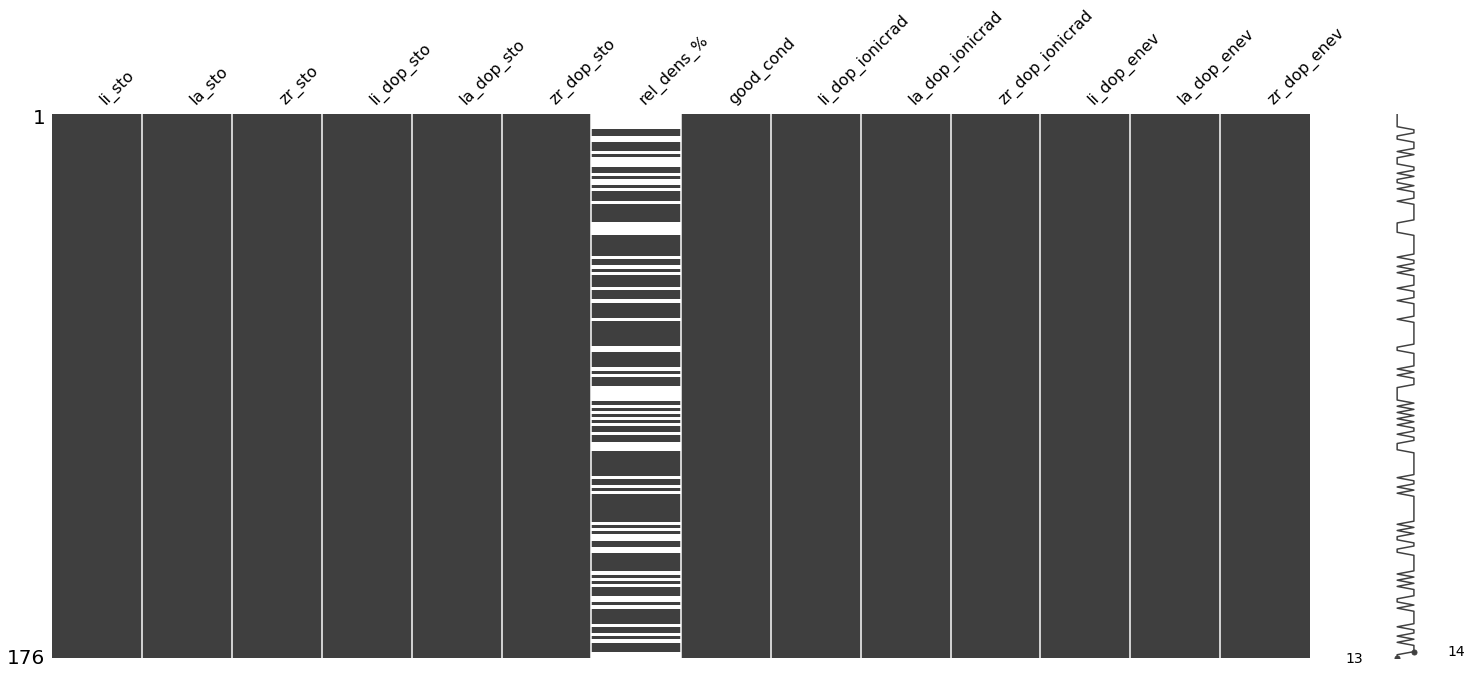

In [19]:
import missingno as msno
msno.matrix(df)

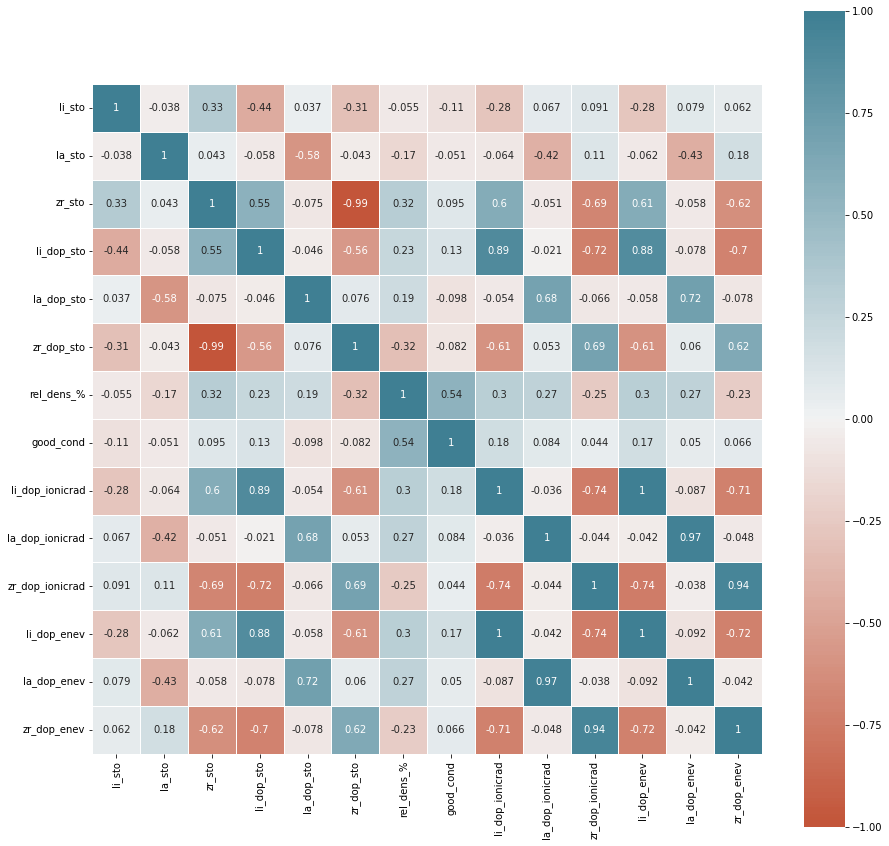

In [20]:
# Finding correlation between features
corr = df.corr()
plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    linewidths = .5, annot = True,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True)

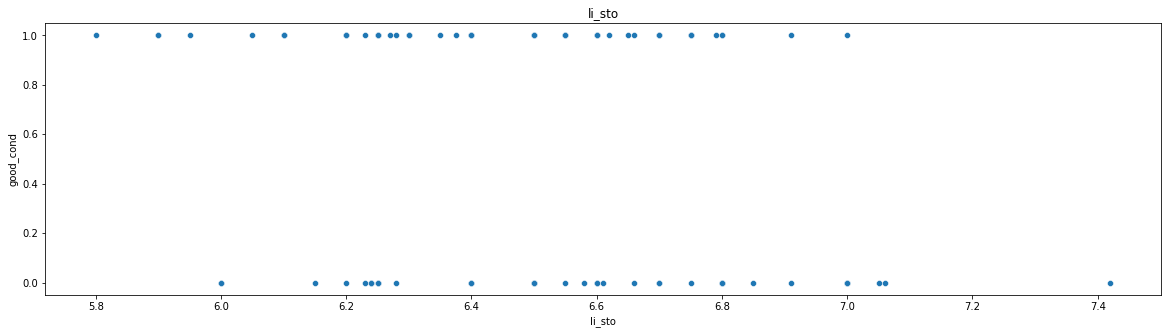

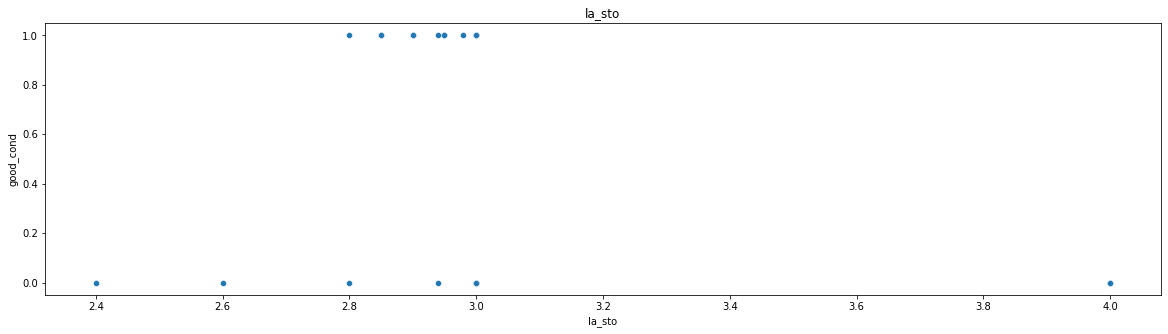

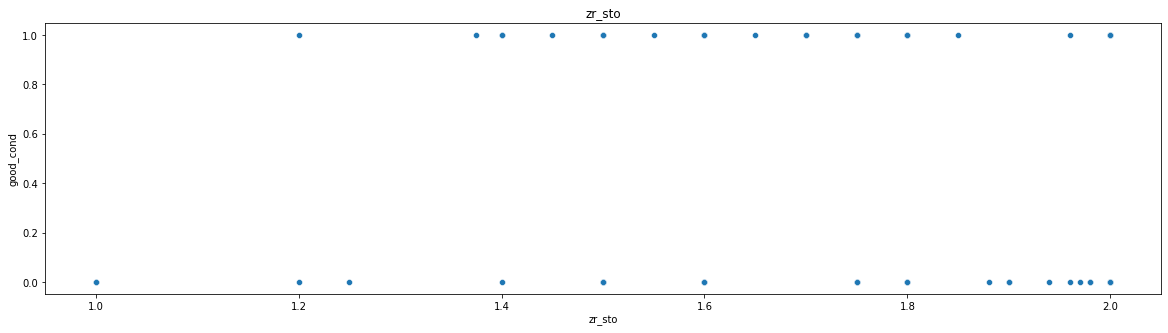

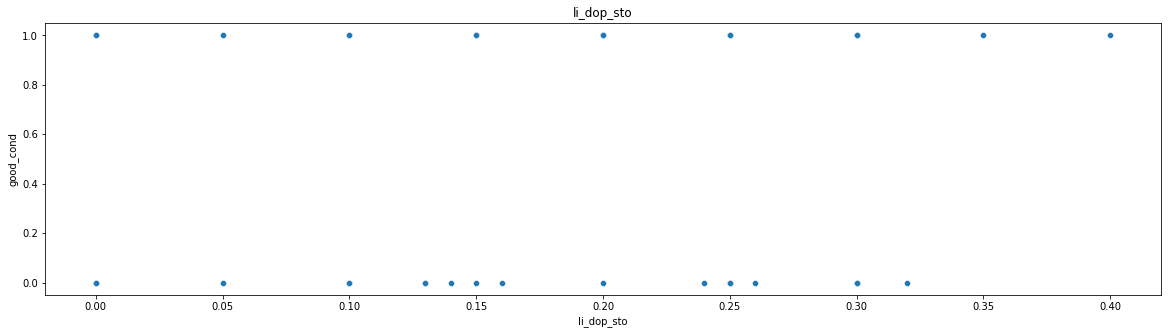

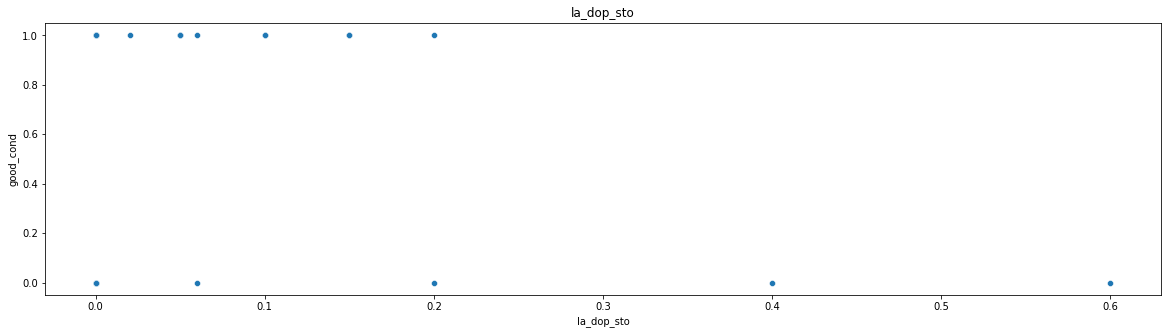

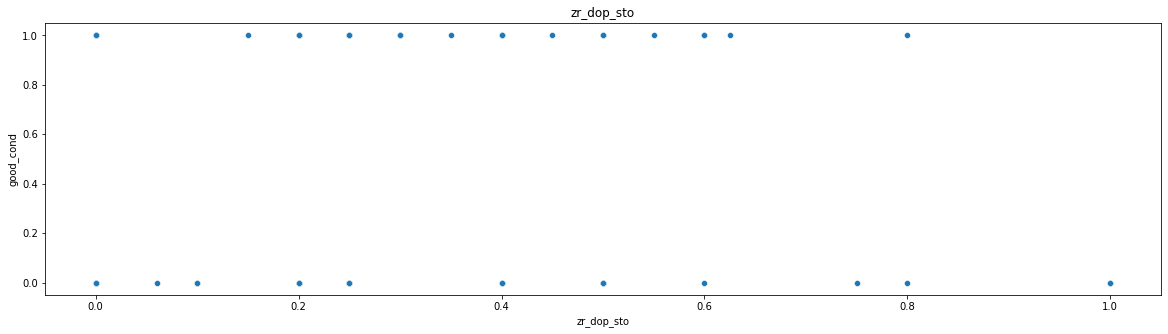

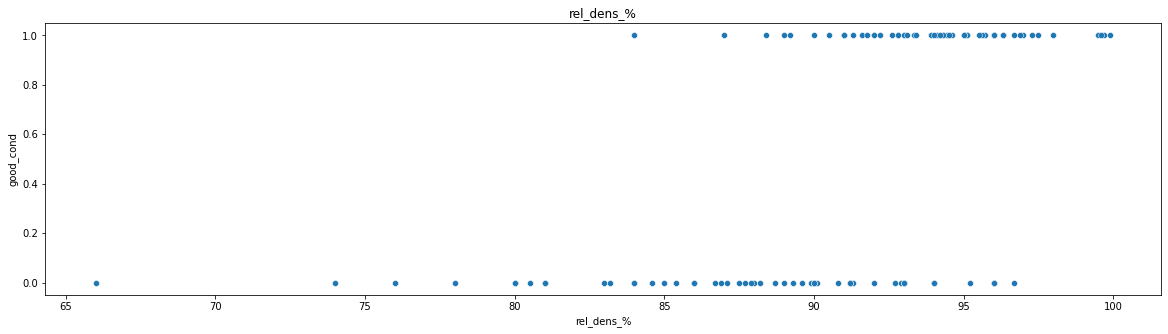

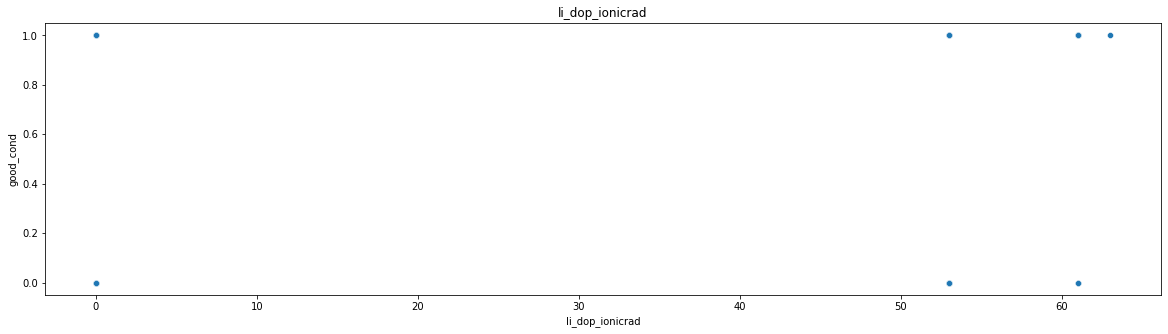

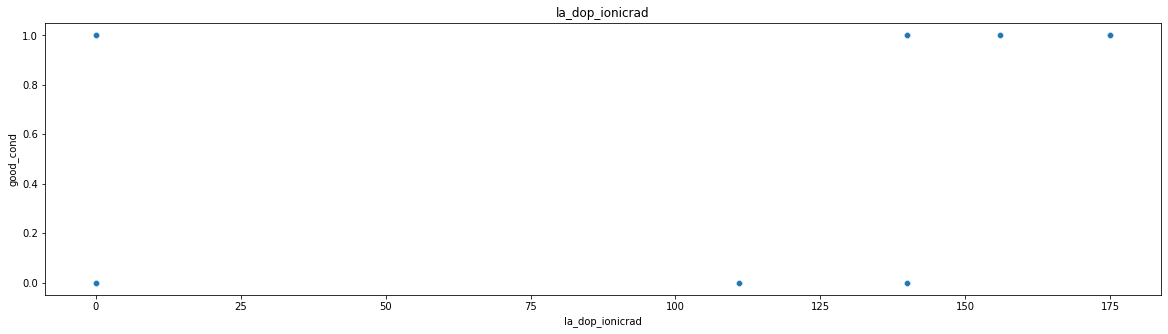

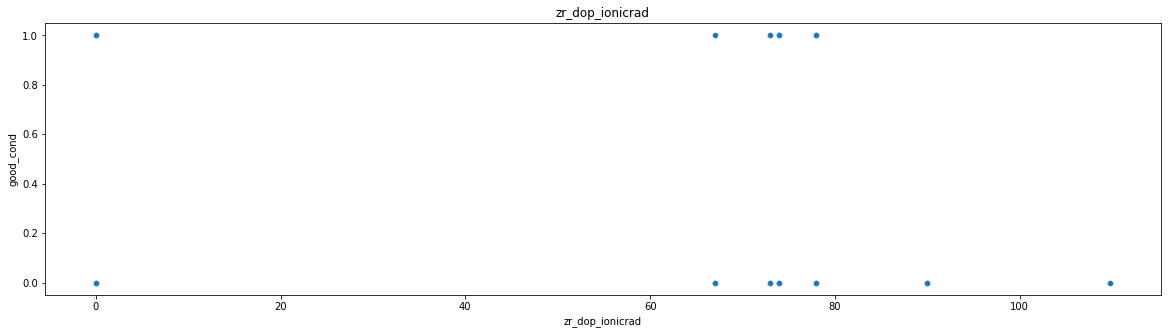

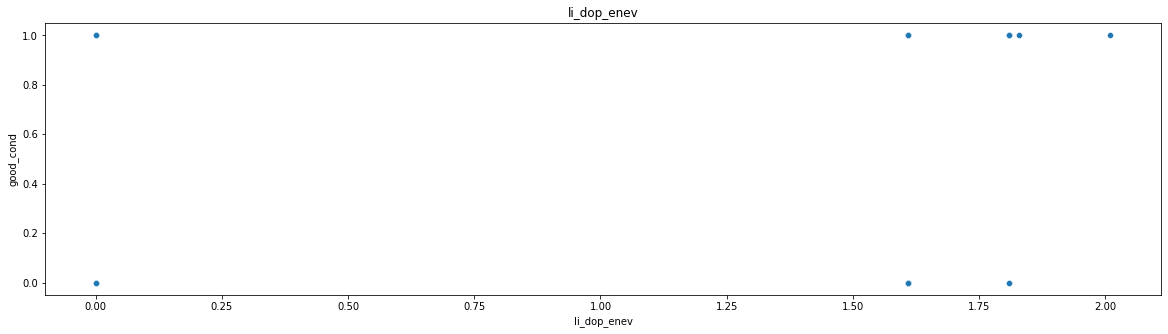

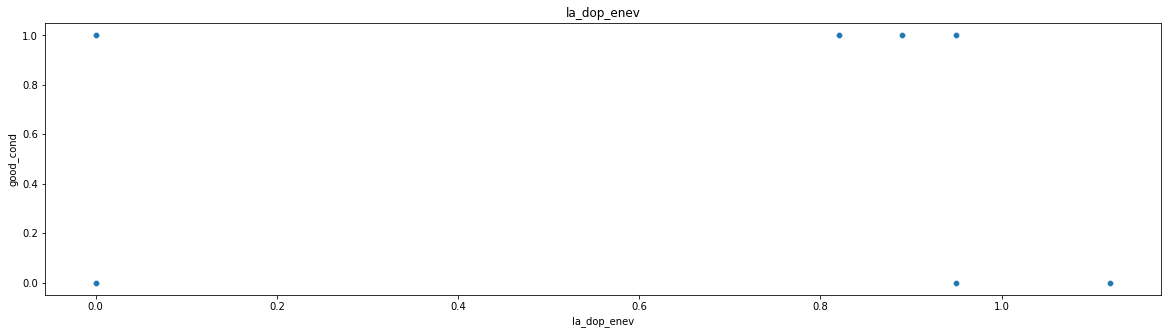

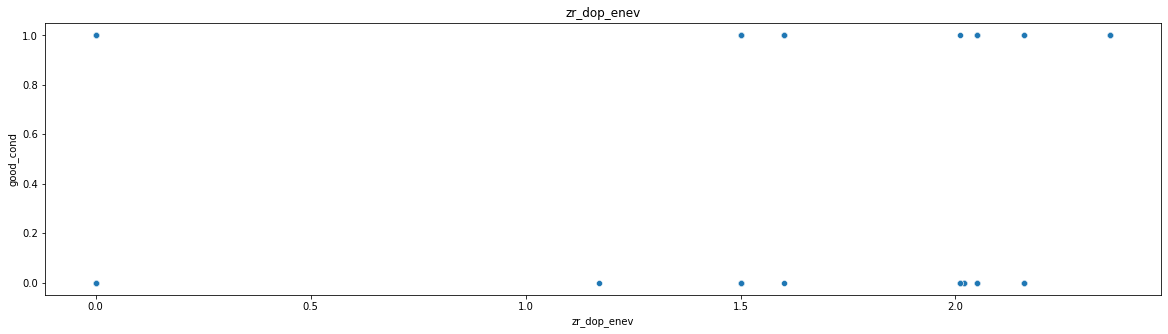

In [21]:
# Making scatterplots to illustrate feature data distribution in respect to conductivity
for col in df.columns.values:
    if col == 'good_cond':
        continue
    plt.figure(figsize=(20,5))
    sns.scatterplot(df.dropna()[col], df.dropna()['good_cond'])
    plt.title(col)
    plt.show()

In [24]:
#Distribution Comparison

numerical_features = [col for col in df.columns if df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(df[col].unique()) < 21 and col not in ['Compound']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['Compound']]
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of discrete features : ",len(categorical_features))

Total Number of Numerical Columns :  14
Number of discrete features :  10
No of continuous features are :  4
Number of discrete features :  0


In [25]:
# Defining X (features) and y (target property) for cut dataset
X = df.dropna().drop('good_cond', axis=1)
y = df.dropna()['good_cond']
print(X)

X_full = df.drop('good_cond', axis=1)
y_full = df['good_cond']

     li_sto  la_sto  zr_sto  li_dop_sto  la_dop_sto  zr_dop_sto  rel_dens_%  \
5      6.00    3.00    1.00        0.00        0.00        1.00       84.00   
6      6.00    3.00    1.00        0.00        0.00        1.00       86.00   
9      6.20    3.00    1.20        0.00        0.00        0.80       84.00   
10     6.20    3.00    1.20        0.00        0.00        0.80       76.00   
11     6.25    3.00    1.25        0.00        0.00        0.75       83.00   
..      ...     ...     ...         ...         ...         ...         ...   
167    6.85    3.00    2.00        0.05        0.00        0.00       94.00   
169    7.00    3.00    2.00        0.00        0.00        0.00       96.70   
171    7.00    3.00    2.00        0.00        0.00        0.00       87.70   
172    7.00    3.00    2.00        0.00        0.00        0.00       88.70   
173    7.00    3.00    2.00        0.00        0.00        0.00       84.60   

     li_dop_ionicrad  la_dop_ionicrad  zr_dop_ionic

In [18]:
# Linearity Check

#f, axes = plt.subplots(7,3 , figsize=(30, 30), sharex=False)
#for i, feature in enumerate(numerical_features):
    #sns.scatterplot(data=df, x = feature, y= "Total_Conductivity",ax=axes[i%7, i//7])

In [26]:
import lazypredict 
from lazypredict import Supervised 
from lazypredict.Supervised import LazyRegressor

print("ALL AVAILABLE REGRESSION MODELS:")
for i in range(42):
    print(i+1, lazypredict.Supervised.REGRESSORS[i][0])

ALL AVAILABLE REGRESSION MODELS:
1 AdaBoostRegressor
2 BaggingRegressor
3 BayesianRidge
4 DecisionTreeRegressor
5 DummyRegressor
6 ElasticNet
7 ElasticNetCV
8 ExtraTreeRegressor
9 ExtraTreesRegressor
10 GammaRegressor
11 GaussianProcessRegressor
12 GradientBoostingRegressor
13 HistGradientBoostingRegressor
14 HuberRegressor
15 KNeighborsRegressor
16 KernelRidge
17 Lars
18 LarsCV
19 Lasso
20 LassoCV
21 LassoLars
22 LassoLarsCV
23 LassoLarsIC
24 LinearRegression
25 LinearSVR
26 MLPRegressor
27 NuSVR
28 OrthogonalMatchingPursuit
29 OrthogonalMatchingPursuitCV
30 PassiveAggressiveRegressor
31 PoissonRegressor
32 QuantileRegressor
33 RANSACRegressor
34 RandomForestRegressor
35 Ridge
36 RidgeCV
37 SGDRegressor
38 SVR
39 TransformedTargetRegressor
40 TweedieRegressor
41 XGBRegressor
42 LGBMRegressor


In [37]:
# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state =0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(101, 13) (12, 13) (101,) (12,)


In [38]:
# Using LazyClassifier for cut dataset
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
modellist = list(models.index.values) # Get the list of the methods' names
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 33.73it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,525.71,-94.40,4.82,0.01
KernelRidge,12.15,-1.03,0.70,0.01
RANSACRegressor,10.43,-0.71,0.65,0.07
QuantileRegressor,10.43,-0.71,0.65,0.16
PassiveAggressiveRegressor,7.63,-0.21,0.54,0.01
LinearSVR,7.12,-0.11,0.52,0.00
DummyRegressor,6.61,-0.02,0.50,0.01
ElasticNet,6.61,-0.02,0.50,0.01
LassoLars,6.61,-0.02,0.50,0.00


In [39]:
# Hyperparameter Tuning using Optuna

import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV

RANDOM_SEED = 12

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

In [40]:
def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score} \nOptimized parameters: {params}")
    return params

In [41]:
def ridge_objective(trial):

    _alpha = trial.suggest_float("alpha", 0.1, 20)

    ridge = Ridge(alpha=_alpha, random_state=RANDOM_SEED)

    score = cross_val_score(
        ridge,X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score

# Best score: -0.13586760243668033 
ridge_params = {'alpha': 19.997759851201025}

In [42]:
ridge = Ridge(**ridge_params, random_state=RANDOM_SEED)
ridge.fit(X_train,y_train)

Ridge(alpha=19.997759851201025, random_state=12)

In [43]:
def lasso_objective(trial):

    _alpha = trial.suggest_float("alpha", 0.0001, 1)

    lasso = Lasso(alpha=_alpha, random_state=RANDOM_SEED)

    score = cross_val_score(
        lasso,X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


# Best score: -0.13319435700230317 
lasso_params = {'alpha': 0.0006224224345371836}

In [44]:
lasso = Lasso(**lasso_params, random_state=RANDOM_SEED)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0006224224345371836, random_state=12)

In [45]:
#Gradient Boosting Regressor

def gbr_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 20)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 20)
    _max_features = trial.suggest_int("max_features", 10, 50)

    gbr = GradientBoostingRegressor(
        n_estimators=_n_estimators,
        learning_rate=_learning_rate,
        max_depth=_max_depth, 
        max_features=_max_features,
        min_samples_leaf=_min_samples_leaf,
        min_samples_split=_min_samp_split,
        
        random_state=RANDOM_SEED,
    )

    score = cross_val_score(
        gbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


#gbr_params = tune(gbr_objective)
# Best score: -0.12797257860944733 
# -0.010733714852331853.
# gbr_params = {'n_estimators': 1696, 'learning_rate': 0.012956468841071024, 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 19, 'max_features': 30}
# gbr_params = {'n_estimators': 1863, 'learning_rate': 0.13403873465725344, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 28} 



# Best score: -0.12736574760627803 
gbr_params = {'n_estimators': 1831, 'learning_rate': 0.01325036780847096, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 29}

In [46]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import joblib

gbr = GradientBoostingRegressor(random_state=RANDOM_SEED, **gbr_params)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01325036780847096, max_features=29,
                          min_samples_leaf=2, min_samples_split=17,
                          n_estimators=1831, random_state=12)

In [47]:
#XGBRegressor
def xgb_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _gamma = trial.suggest_float("gamma", 0.01, 1)
    _min_child_weight = trial.suggest_float("min_child_weight", 0.1, 10)
    _subsample = trial.suggest_float('subsample', 0.01, 1)
    _reg_alpha = trial.suggest_float('reg_alpha', 0.01, 10)
    _reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10)

    
    xgbr = xgb.XGBRegressor(
        n_estimators=_n_estimators,
        max_depth=_max_depth, 
        learning_rate=_learning_rate,
        gamma=_gamma,
        min_child_weight=_min_child_weight,
        subsample=_subsample,
        reg_alpha=_reg_alpha,
        reg_lambda=_reg_lambda,
        random_state=RANDOM_SEED,
    )
    

    score = cross_val_score(
        xgbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


# xgb_params = tune(xgb_objective)
# xgb_params = {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.03314181092616917, 'gamma': 0.03861572735293306, 'min_child_weight': 2.5264657011723335, 'subsample': 0.69824536298609, 'reg_alpha': 0.021753223362733998, 'reg_lambda': 3.216048970671949}
# Best score: -0.1225190827846444


# xgb_params = {'n_estimators': 682, 'max_depth': 3, 'learning_rate': 0.43003823365583715, 'gamma': 0.44679747359450517, 'min_child_weight': 4.786235656907614, 'subsample': 0.6778813667991118, 'reg_alpha': 6.798417381445857, 'reg_lambda': 5.499314779688684}
 # value: -0.03293522695363604.




xgb_params = {'n_estimators': 847, 'max_depth': 7, 'learning_rate': 0.07412279963454066, 'gamma': 0.01048697764796929, 'min_child_weight': 5.861571837417184, 'subsample': 0.7719639391828977, 'reg_alpha': 2.231609305115769, 'reg_lambda': 3.428674606766844}
#  . Best is trial 34 with value: -0.13193488071216425.

In [48]:
xgbr = xgb.XGBRegressor(random_state=RANDOM_SEED, **xgb_params)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.01048697764796929, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.07412279963454066,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=7,
             max_leaves=0, min_child_weight=5.861571837417184, missing=nan,
             monotone_constraints='()', n_estimators=847, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=12,
             reg_alpha=2.231609305115769, reg_lambda=3.428674606766844, ...)

In [49]:
#LGBMRegressor
import lightgbm as lgb

def lgb_objective(trial):
    _num_leaves = trial.suggest_int("num_leaves", 50, 100)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _min_child_weight = trial.suggest_float("min_child_weight", 0.1, 10)
    _reg_alpha = trial.suggest_float('reg_alpha', 0.01, 10)
    _reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10)
    _subsample = trial.suggest_float('subsample', 0.01, 1)


    
    lgbr = lgb.LGBMRegressor(objective='regression',
                             num_leaves=_num_leaves,
                             max_depth=_max_depth,
                             learning_rate=_learning_rate,
                             n_estimators=_n_estimators,
                             min_child_weight=_min_child_weight,
                             subsample=_subsample,
                             reg_alpha=_reg_alpha,
                             reg_lambda=_reg_lambda,
                             random_state=RANDOM_SEED,
    )
    

    score = cross_val_score(
        lgbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score

# Best score: -0.12497294451988177 
# lgb_params = tune(lgb_objective)
lgb_params = {'num_leaves': 81, 'max_depth': 2, 'learning_rate': 0.05943111506493225, 'n_estimators': 1668, 'min_child_weight': 4.6721695700874015, 'reg_alpha': 0.33400189583009254, 'reg_lambda': 1.4457484337302167, 'subsample': 0.42380175866399206}


# Best score: -0.012014396001532427 
# lgb_params = {'num_leaves': 84, 'max_depth': 15, 'learning_rate': 0.3765620685374334, 'n_estimators': 1363, 'min_child_weight': 2.933698765978165, 'reg_alpha': 0.025700686948561362, 'reg_lambda': 9.02451400894547, 'subsample': 0.9947557511368282}

In [50]:
lgbr = lgb.LGBMRegressor(objective='regression', random_state=RANDOM_SEED, **lgb_params)
lgbr.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.05943111506493225, max_depth=2,
              min_child_weight=4.6721695700874015, n_estimators=1668,
              num_leaves=81, objective='regression', random_state=12,
              reg_alpha=0.33400189583009254, reg_lambda=1.4457484337302167,
              subsample=0.42380175866399206)

In [51]:
# stack models
#StackingRegressor

stack = StackingRegressor(
    estimators=[
        ('ridge', ridge),
        ('lasso', lasso),
        ('gradientboostingregressor', gbr),
        ('xgb', xgbr),
        ('lgb', lgbr),
        # ('svr', svr), # Not using this for now as its score is significantly worse than the others
    ],
    cv=kfolds)
stack.fit(X_train,y_train)

StackingRegressor(cv=KFold(n_splits=10, random_state=12, shuffle=True),
                  estimators=[('ridge',
                               Ridge(alpha=19.997759851201025,
                                     random_state=12)),
                              ('lasso',
                               Lasso(alpha=0.0006224224345371836,
                                     random_state=12)),
                              ('gradientboostingregressor',
                               GradientBoostingRegressor(learning_rate=0.01325036780847096,
                                                         max_features=29,
                                                         min_samples_leaf=2,
                                                         min_samples_split=17,
                                                         n_est...
                                            predictor='auto', random_state=12,
                                            reg_alpha=2.231609305115769,
                                            reg_lambda=3.428674606766844, ...)),
                              ('lgb',
                               LGBMRegressor(learning_rate=0.05943111506493225,
                                             max_depth=2,
                                             min_child_weight=4.6721695700874015,
                                             n_estimators=1668, num_leaves=81,
                                             objective='regression',
                                             random_state=12,
                                             reg_alpha=0.33400189583009254,
                                             reg_lambda=1.4457484337302167,
                                             subsample=0.42380175866399206))])

In [52]:
joblib.dump(stack, "prediction_model1.pkl")
model=joblib.load("prediction_model1.pkl")
model

StackingRegressor(cv=KFold(n_splits=10, random_state=12, shuffle=True),
                  estimators=[('ridge',
                               Ridge(alpha=19.997759851201025,
                                     random_state=12)),
                              ('lasso',
                               Lasso(alpha=0.0006224224345371836,
                                     random_state=12)),
                              ('gradientboostingregressor',
                               GradientBoostingRegressor(learning_rate=0.01325036780847096,
                                                         max_features=29,
                                                         min_samples_leaf=2,
                                                         min_samples_split=17,
                                                         n_est...
                                            predictor='auto', random_state=12,
                                            reg_alpha=2.231609305115769,
                                            reg_lambda=3.428674606766844, ...)),
                              ('lgb',
                               LGBMRegressor(learning_rate=0.05943111506493225,
                                             max_depth=2,
                                             min_child_weight=4.6721695700874015,
                                             n_estimators=1668, num_leaves=81,
                                             objective='regression',
                                             random_state=12,
                                             reg_alpha=0.33400189583009254,
                                             reg_lambda=1.4457484337302167,
                                             subsample=0.42380175866399206))])

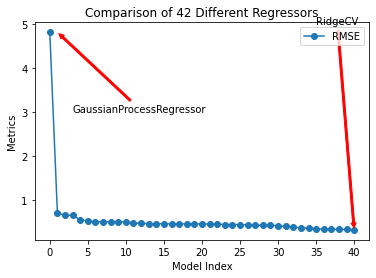

In [53]:
idx = [i for i in range(41)]
plt.plot(idx, models["RMSE"][:41]  , label = "RMSE" , marker = 'o' )


plt.annotate(models.index[0] , 
             (1,models["RMSE"][0]) , 
             xytext  =(3,3),
             arrowprops = dict(
                               arrowstyle = "simple",
                 color = "red"
                              ))

plt.annotate(models.index[26] , 
             (40 , models["RMSE"][40]) ,
             xytext  =(35,5),
             arrowprops = dict(
                               arrowstyle = "simple",
                                 color = "red"

                              ))
plt.xlabel("Model Index")
plt.ylabel("Metrics")
plt.title("Comparison of 42 Different Regressors")
plt.legend()
plt.show()

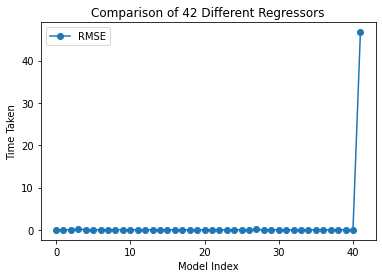

In [59]:
idx = [i for i in range(42)]
plt.plot(idx, models["Time Taken"] , label = "RMSE" ,marker = "o" )
plt.xlabel("Model Index")
plt.ylabel("Time Taken")
plt.title("Comparison of 42 Different Regressors")
plt.legend()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'AdaBoostRegressor'),
  Text(1, 0, 'KNeighborsRegressor'),
  Text(2, 0, 'LGBMRegressor'),
  Text(3, 0, 'HistGradientBoostingRegressor'),
  Text(4, 0, 'RandomForestRegressor'),
  Text(5, 0, 'ExtraTreeRegressor'),
  Text(6, 0, 'BaggingRegressor'),
  Text(7, 0, 'ExtraTreesRegressor'),
  Text(8, 0, 'GradientBoostingRegressor'),
  Text(9, 0, 'ElasticNetCV'),
  Text(10, 0, 'LassoCV'),
  Text(11, 0, 'Lars'),
  Text(12, 0, 'RidgeCV'),
  Text(13, 0, 'LarsCV'),
  Text(14, 0, 'LassoLarsCV'),
  Text(15, 0, 'LassoLarsIC'),
  Text(16, 0, 'Ridge'),
  Text(17, 0, 'BayesianRidge'),
  Text(18, 0, 'TransformedTargetRegressor'),
  Text(19, 0, 'LinearRegression'),
  Text(20, 0, 'SGDRegressor'),
  Text(21, 0, 'OrthogonalMatchingPursuitCV'),
  Text(22, 0, 'OrthogonalMatchingPursuit'),
  Text(23, 0, 'Gamma

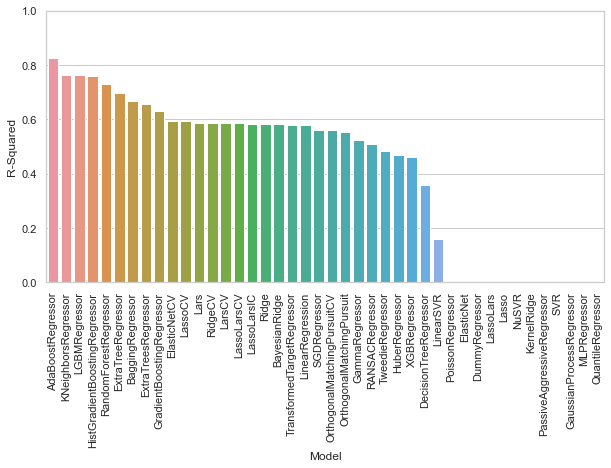

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models.index, y="R-Squared", data=models)
ax.set(ylim=(0, 1))
plt.xticks(rotation=90)